In [3]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



stocks = input("Enter the code of the Stock: ")
df = yf.download(stocks, "2008-01-01","2023-01-01",auto_adjust=True)
print(df.head())

Enter the code of the Stock: NG=F
[*********************100%***********************]  1 of 1 completed
             Open   High    Low  Close  Adj Close  Volume
Date                                                     
2008-01-02  7.572  7.876  7.564  7.850      7.850   68553
2008-01-03  7.873  7.980  7.610  7.674      7.674   72742
2008-01-04  7.652  7.859  7.500  7.841      7.841   61496
2008-01-07  7.803  7.940  7.701  7.879      7.879   56675
2008-01-08  7.909  7.997  7.880  7.967      7.967   53775


In [8]:
print(df.shape)
df.describe()


(3777, 6)


,Open,High,Low,Close,Adj Close,Volume
count,3777.000000,3777.000000,3777.000000,3777.000000,3777.000000,3777.000000
mean,3.907038,3.994599,3.815869,3.900649,3.900649,130284.433413
std,1.909160,1.960113,1.853988,1.904217,1.904217,54150.304925
min,1.441000,1.567000,1.432000,1.482000,1.482000,0.000000
25%,2.733000,2.778000,2.684000,2.731000,2.731000,91766.000000
50%,3.439000,3.508000,3.360000,3.434000,3.434000,125188.000000
75%,4.369000,4.439000,4.274000,4.358000,4.358000,160158.000000
max,13.580000,13.694000,13.306000,13.577000,13.577000,459196.000000


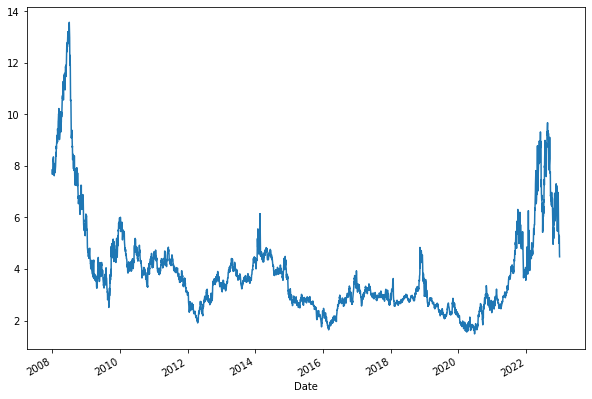

In [9]:
df.Close.plot(figsize=(10,7),)
plt.show()

In [11]:
x = df.drop("Close",axis=1)
y = df["Close"]
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42) 
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(3021, 5)
(756, 5)
(3021,)
(756,)


In [12]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)
pred1 = lr.predict(x_test)
print(pred1)

[ 4.079       3.12700009  2.14100003  4.60900021  2.89199996  5.18599987
  2.28299999  6.50099993  4.7249999   2.46700001  2.72199988  2.74900007
  2.3039999   2.82800007  4.19799995  2.2019999   5.375      13.01099968
  4.875       2.03200006  3.46000004  3.31500006  4.82399988  4.65799999
  3.79699993  2.352       2.91400003  3.296       6.31799984  3.56200004
  3.04399991  4.27699995  4.56799984  4.34299994  4.58099985  4.15999985
  2.8499999   4.5079999   2.55200005  2.84699988  4.11199999  7.6789999
 11.39900017  3.05100012  7.24900007  4.56699991  1.82099998  2.68000007
  2.19300008  3.53800011  2.61800003  4.61999989  2.79399991  5.89799976
  1.98000002  3.51300001  2.95900011  8.72599983  2.8210001   3.70300007
  3.7980001   2.80200005  2.92799997  4.33799982  2.602       4.51300001
  2.546       3.47399998  3.00699997  4.53000021  2.39899993  4.046
  2.40799999  1.90699995  4.36899996  7.90999985  2.73300004  3.19099998
  4.78700018  7.83300018  2.68300009  4.08900023  1.755  

In [13]:
print(y_test)

Date
2022-01-10    4.079
2011-12-16    3.127
2020-01-08    2.141
2014-02-28    4.609
2017-08-25    2.892
              ...  
2014-08-27    3.957
2011-01-12    4.531
2017-01-24    3.279
2020-08-24    2.513
2022-02-01    4.751
Name: Close, Length: 756, dtype: float64


In [14]:
from sklearn.metrics import mean_squared_error,r2_score
def cal(yt,yp):
  mse = mean_squared_error(yt,yp)
  rmse = np.sqrt(mse)
  r = r2_score(yt,yp)
  print("mse: ",mse)
  print("rmse: ",rmse)
  #r2 should be equal or near to 1.0 then it is a good model
  print("r2score: ",r)


print(cal(y_test,pred1))

mse:  3.6014604637086584e-30
rmse:  1.897751423055364e-15
r2score:  1.0
None


In [15]:
from sklearn.linear_model import Lasso,Ridge
la = Lasso().fit(x_train,y_train)
ri = Ridge().fit(x_train,y_train)
#Lasso
lap = la.predict(x_test)
cal(y_test,lap)

mse:  0.2630664848150672
rmse:  0.5129000729333807
r2score:  0.922798006195272


In [16]:
#Ridge
#ridge is less prone to overfitting
rap = ri.predict(x_test)
cal(y_test,rap)

mse:  2.16389364164469e-05
rmse:  0.004651767020869263
r2score:  0.999993649631817
